In [1]:
#Importing necessary library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# import and load csv dataset

my_df = pd.read_csv("T1_A24census2_cleaned.csv")
my_df.head()
my_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Inconsistent Marital Status,Inconsistent Religion
0,1,Scott Avenue,Shirley,Newton,32,Head,Single,Female,Art therapist,No,Christian,False,False
1,2,Scott Avenue,Robert,Smith,76,Head,Widowed,Male,Retired Land,Yes,Christian,False,False
2,3,Scott Avenue,Geraldine,Jones,20,Head,Single,Female,University Student,No,Christian,False,False
3,4,Scott Avenue,Kevin,Steele,33,Head,Single,Male,Youth worker,No,Christian,False,False
4,5,Scott Avenue,Denis,Adams,40,Head,Single,Male,Glass blower/designer,No,Christian,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9281,1,Mills Chalet,Richard,Pickering,16,Son,Single,Male,Student,No,No Religion,False,False
9282,1,Mills Chalet,Alex,Pickering,12,Son,Single,Male,Student,No,Christian,False,False
9283,1,Mills Chalet,Bernard,Pickering,11,Son,Single,Male,Student,No,No Religion,False,False
9284,1,Mills Chalet,Sophie,Pickering,7,Daughter,Single,Female,Student,No,Christian,False,False


In [5]:
# Checking if it is the cleaned dataset that has been loaded

my_df.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
Inconsistent Marital Status      0
Inconsistent Religion            0
dtype: int64

## Exercise 1

(A)

Without a previous census, to estimate fertility and birth rate we can make assumption since from the dataset we have Age, Gender, Marital Status, Relationship to Head of House. We can infer the birth rate by focusing on women in reproductive age groups and thier roles in the household.

Some assumptions can be;

Women aged between 25-29 are considered of reproductive age, Women listed as Mother, Wife, Head of the household with children in the household are likely to have given birth.

Children can be inferred from individuals identified under certain age, or who are Son, Daughter etc.

In [7]:
# (B)

# Count number of children aged zero(0)
newborns = my_df[my_df['Age'] == 0]
num_newborns = len(newborns)
print ('Number of children aged zero(0) (newborns):', num_newborns)

Number of children aged zero(0) (newborns): 95


In [9]:
# Count number of women aged 25-29
women_25_29 = my_df[(my_df['Gender'] == 'Female') & (my_df['Age'].between(25, 29))]
num_women_25_29 = len(women_25_29)
print('Number of women aged 25-29:', num_women_25_29)

Number of women aged 25-29: 360


In [11]:
# Calculate the birth rate per 100,000 women aged 25-29
if num_women_25_29 > 0:
    birth_rate_per_100k = (num_newborns / num_women_25_29) * 100000
    print('Birth rate per 100,000 women aged 25-29:', round(birth_rate_per_100k, 2))
else:
    print("No women aged 25-29 in the dataset. Cannot compute birth rate.")

Birth rate per 100,000 women aged 25-29: 26388.89


From this, we can see that there are 95 newborns in the dataset, with 360 number of women aged 25-29 considered of reproductive age.

Birth rate per 100,000 women aged 25-29 from the dataset is 26388.89

Science.
Note to yourselves problems that might exist with this approach.

Some problems include:
Narrowing age range for fertility to 25-29 for calculation, when typically women give birth between 15-49 years, excluding other age groups, which lead to an underestimation of the birth rate.

The calculation also assumes that all children aged zero(0) were given birth to in the past year, when we can argue that some infants may have migrated into the area; this can lead to an over-estimation of births.

Additionally, the dataset doesn't given explict record for us to know if women have given birth recently. Some women in the age group 25-29 may not be partnered, infertile, or choose not to have kids; this can give a misleading report.

## Exercise 2

In [13]:
# To estimate if the birth rate was different in the past compared to the present, we can do it like this

# Count the number of children aged 4
num_children_age_4 = my_df[my_df['Age'] == 4].shape[0]

# Count the number of women aged 30-34
num_women_30_34 = my_df[(my_df['Age'].between(30, 34)) & (my_df['Gender'] == 'Female')].shape[0]

# Calculate the past birth rate per 100,000 women
if num_women_30_34 > 0:
    past_birth_rate_per_100k = (num_children_age_4 / num_women_30_34) * 100000
    print('Estimated Past Birth Rate (per 100,000 women aged 30-34):', round(past_birth_rate_per_100k, 2))
else:
    past_birth_rate_per_100k = 0

Estimated Past Birth Rate (per 100,000 women aged 30-34): 29503.92


Science.
What assumptions (implicit or explicit) are we making for this calculation?

Some explicit assumptions are that women aged 30-34 were primarily child bearers 4 years ago, giving an idea that most women who gave birth to the current 4 years olds were 26-30 years of age 4 years ago. This assumption overlooks the contributions from younger or older women.

It also gives an assumption that all 4 years old kids were given birth to locally i.e, they were given birth to in the same town where the census was taken. It overlooks families that may have moved into the area after their child was born or those who moved out.

This assumption focuses only on women, ignoring the male demographic changes that might indirectly affect birth rates e.g male migration / employment.

## Exercise 3

In [15]:
# To estimate death rate per annum

# Filter the number of people aged 56-60 and 61-65
age_56_60 = my_df[(my_df['Age'] >= 56) & (my_df['Age'] <= 60)]
age_61_65 = my_df[(my_df['Age'] >= 61) & (my_df['Age'] <= 65)]

# Count the number of people in each group
count_56_60 = len(age_56_60)
count_61_65 = len(age_61_65)

print(f"Number of people aged 56-60: {count_56_60}")
print(f"Number of people aged 61-65: {count_61_65}")

Number of people aged 56-60: 502
Number of people aged 61-65: 387


In [17]:
# Estimate the number of deaths over 5 years
estimated_deaths_5_years = count_56_60 - count_61_65

# Calculate annual deaths (divide by 5)
estimated_annual_deaths = estimated_deaths_5_years / 5

# Calculate the death rate per 100,000 of the total population
total_population = len(my_df)
death_rate_per_100k = (estimated_annual_deaths / total_population) * 100000

# Display results
print(f"Estimated number of deaths over 5 years: {estimated_deaths_5_years}")
print(f"Estimated annual deaths: {estimated_annual_deaths:.2f}")
print(f"Estimated annual death rate per 100,000 people: {death_rate_per_100k:.2f}")

Estimated number of deaths over 5 years: 115
Estimated annual deaths: 23.00
Estimated annual death rate per 100,000 people: 247.68


## Exercise 4

In [19]:
# (i)

# Filter the number of people aged 66-70 and 71-75
age_66_70 = my_df[(my_df['Age'] >= 66) & (my_df['Age'] <= 70)]
age_71_75 = my_df[(my_df['Age'] >= 71) & (my_df['Age'] <= 75)]

# Count the number of people in each group
count_66_70 = len(age_66_70)
count_71_75 = len(age_71_75)

print(f"Number of people aged 66-70: {count_66_70}")
print(f"Number of people aged 71-75: {count_71_75}")

Number of people aged 66-70: 302
Number of people aged 71-75: 244


In [21]:
# Estimate the number of deaths over 5 years
estimated_deaths_5_years = count_66_70 - count_71_75

# Calculate annual deaths
estimated_annual_deaths = estimated_deaths_5_years / 5

# Calculate the death rate per 100,000 of the total population
total_population = len(my_df)
death_rate_per_100k = (estimated_annual_deaths / total_population) * 100000

# Display results
print(f"Estimated number of deaths over 5 years: {estimated_deaths_5_years}")
print(f"Estimated annual deaths: {estimated_annual_deaths:.2f}")
print(f"Estimated annual death rate per 100,000 people: {death_rate_per_100k:.2f}")

Estimated number of deaths over 5 years: 58
Estimated annual deaths: 11.60
Estimated annual death rate per 100,000 people: 124.92


Why is this assumption wrong,

Migration effect is a point to look at, people may move away (retirement migration) or into care facilities, impacting the size of the group.

Another point to examine is increased mortality with age, older age groups(71-75) already have higher mortality rate, so their population size will decrease more rapidly.

Also some historical birth rates and life expectancy can differ between generations, making  the age groups unequal from the start

Additionally improvment in healthcare over the years can lead to better chances of survival for younger seniors compared to older generations.

In [23]:
# (ii)

# Check the maximum age in the 'Age' column
max_age = my_df['Age'].max()
print(f"The highest age in the dataset is: {max_age}")

The highest age in the dataset is: 121


In [25]:
# Define age group pairs for comparison: (younger_group, older_group)

age_groups = [(66, 70, 71, 75), 
              (71, 75, 76, 80), 
              (76, 80, 81, 85), 
              (81, 85, 86, 90), 
              (86, 90, 91, 95),
              (96, 100, 101, 105),
              (106, 110, 111, 115),
              (116, 120, 121, 125)]

# Total population size
total_population = len(my_df)

# Loop through each of the pair and calculate the death rate
for younger_start, younger_end, older_start, older_end in age_groups:
    
    # Filter for younger and older age groups
    younger_group = my_df[(my_df['Age'] >= younger_start) & (my_df['Age'] <= younger_end)]
    older_group = my_df[(my_df['Age'] >= older_start) & (my_df['Age'] <= older_end)]
    
    # Count the number of people in each group
    younger_count = len(younger_group)
    older_count = len(older_group)
    
    # Estimate deaths over 5 years
    estimated_deaths_5_years = younger_count - older_count

    # Handle negative results by warning and setting to zero
    if estimated_deaths_5_years < 0:
        print (f'\n Warning: Negative deaths in Age group { younger_start}-{younger_end} → {older_start}-{older_end}.Review data.')
        # Set negative deaths to zero
        estimated_deaths_5_years = 0
    
    estimated_annual_deaths = estimated_deaths_5_years / 5
    
    # Calculate death rate per 100,000
    death_rate_per_100k = (estimated_annual_deaths / total_population) * 100000
    
    # Display the results
    print(f"\nAge Group {younger_start}-{younger_end} → {older_start}-{older_end}:")
    print(f"  Younger Group Count: {younger_count}")
    print(f"  Older Group Count: {older_count}")
    print(f"  Estimated Deaths over 5 years: {estimated_deaths_5_years}")
    print(f"  Estimated Annual Deaths: {estimated_annual_deaths:.2f}")
    print(f"  Death Rate per 100,000: {death_rate_per_100k:.2f}")


Age Group 66-70 → 71-75:
  Younger Group Count: 302
  Older Group Count: 244
  Estimated Deaths over 5 years: 58
  Estimated Annual Deaths: 11.60
  Death Rate per 100,000: 124.92

Age Group 71-75 → 76-80:
  Younger Group Count: 244
  Older Group Count: 162
  Estimated Deaths over 5 years: 82
  Estimated Annual Deaths: 16.40
  Death Rate per 100,000: 176.61

Age Group 76-80 → 81-85:
  Younger Group Count: 162
  Older Group Count: 133
  Estimated Deaths over 5 years: 29
  Estimated Annual Deaths: 5.80
  Death Rate per 100,000: 62.46

Age Group 81-85 → 86-90:
  Younger Group Count: 133
  Older Group Count: 51
  Estimated Deaths over 5 years: 82
  Estimated Annual Deaths: 16.40
  Death Rate per 100,000: 176.61

Age Group 86-90 → 91-95:
  Younger Group Count: 51
  Older Group Count: 11
  Estimated Deaths over 5 years: 40
  Estimated Annual Deaths: 8.00
  Death Rate per 100,000: 86.15


Age Group 96-100 → 101-105:
  Younger Group Count: 11
  Older Group Count: 12
  Estimated Deaths over 5 y

In [27]:
# (iii)

# The total death rate across all age groups

# Total population size
total_population = len(my_df)

# Initialize total deaths counter, this sets the starting value of the variable to zero. it acts as a counter that will increase as the
# program calculates estimated death for each age group
total_estimated_annual_deaths = 0

# Loop through age groups in 5-year intervals (0-4, 5-9, ..., 116-120)
for age_start in range(0, 121, 5):
    younger_start = age_start
    # Ensure it doesn't exceed 121
    younger_end = min(age_start + 4, 121) 
    
    older_start = younger_end + 1
    older_end = min(older_start + 4, 121)

    # Filter the age groups
    younger_group = my_df[(my_df['Age'] >= younger_start) & (my_df['Age'] <= younger_end)]
    older_group = my_df[(my_df['Age'] >= older_start) & (my_df['Age'] <= older_end)]
    
    # Count the number of people in each group
    younger_count = len(younger_group)
    older_count = len(older_group)
    
    
    # Estimate deaths over 5 years
    
    # No negative deaths
    estimated_deaths_5_years = max(younger_count - older_count, 0) 
    estimated_annual_deaths = estimated_deaths_5_years / 5
    
    # Add to total estimated deaths, the += operator is for accumulating values to an existing variable
    total_estimated_annual_deaths += estimated_annual_deaths

    # Death rate per 100,000 for this interval
    death_rate_per_100k = (estimated_annual_deaths / total_population) * 100000
    
    # Display results for each age group
    print(f"\nAge Group {younger_start}-{younger_end} → {older_start}-{older_end}:")
    print(f"  Younger Group Count: {younger_count}")
    print(f"  Older Group Count: {older_count}")
    print(f"  Estimated Deaths over 5 years: {estimated_deaths_5_years}")
    print(f"  Estimated Annual Deaths: {estimated_annual_deaths:.2f}")
    print(f"  Death Rate per 100,000: {death_rate_per_100k:.2f}")

# Final Total Death Rate Across All Age Groups
total_death_rate_per_100k = (total_estimated_annual_deaths / total_population) * 100000

print("\n Overall Death Statistics ")
print(f"Total Estimated Annual Deaths Across All Age Groups: {total_estimated_annual_deaths:.2f}")
print(f"Total Death Rate per 100,000 Population: {total_death_rate_per_100k:.2f}")


Age Group 0-4 → 5-9:
  Younger Group Count: 548
  Older Group Count: 584
  Estimated Deaths over 5 years: 0
  Estimated Annual Deaths: 0.00
  Death Rate per 100,000: 0.00

Age Group 5-9 → 10-14:
  Younger Group Count: 584
  Older Group Count: 664
  Estimated Deaths over 5 years: 0
  Estimated Annual Deaths: 0.00
  Death Rate per 100,000: 0.00

Age Group 10-14 → 15-19:
  Younger Group Count: 664
  Older Group Count: 716
  Estimated Deaths over 5 years: 0
  Estimated Annual Deaths: 0.00
  Death Rate per 100,000: 0.00

Age Group 15-19 → 20-24:
  Younger Group Count: 716
  Older Group Count: 751
  Estimated Deaths over 5 years: 0
  Estimated Annual Deaths: 0.00
  Death Rate per 100,000: 0.00

Age Group 20-24 → 25-29:
  Younger Group Count: 751
  Older Group Count: 673
  Estimated Deaths over 5 years: 78
  Estimated Annual Deaths: 15.60
  Death Rate per 100,000: 167.99

Age Group 25-29 → 30-34:
  Younger Group Count: 673
  Older Group Count: 691
  Estimated Deaths over 5 years: 0
  Estimat

 #### (iv)

 #### is the population growing due to a difference between birth rate and death rate?
#### Science.
#### Justify your answer and emphasise your caveats and/or assumptions.

#### According to the analysis carried out from the project data, the population is growing. from the anaylsis carried from Birth rate per 100,000 women aged 25-29, the result came out a total of 26388.89. Additionally Estimated Past Birth Rate (per 100,000 women aged 30-34) gave a total of 29503.92. 

#### The total death rate per 100,000 across all ages of the total population gave a total of 1791.94, showing there is an increase in birth rate compared to death rate at same age range intervals (5 years). This shows a natural increase in population.

#### There is a mortality assumption as death rate calculated were based on comparing age groups, but doesn't capture actual deaths, only inferred ones. 

#### Additionally, no migration was considered, the analysis only considers natuaral growth and ignores immigration and emigration, which of course can impact population size.

## Exercise 5

#### Science 1. Is there a way we could make this inference? (e.g., by looking at their occupations?).

Yes we can infer potential immigration by analyzing occupations and relationship status. Lodgers or visitors with permanent jobs may be considering permanent relocation.

Analyzing age groups (e.g., young adults aged 20–35) in combination with occupation can provide clues about who is likely moving into the area

#### Science 2.Could we infer how many divorcees left the town over the course of one year?
Indirectly, yes. We can estimate how many divorcees might have left by counting the number of individuals marked as divorced in the marital status column.

This method isn't perfect because some divorcees might stay in the same area, remarry, or move elsewhere for reasons unrelated to their divorce. Additionally, name changes can make it difficult to track ex-partners.

#### Science 3.Is there any other sort of person in the census you could identify as potentially moving in recently, or possibly about to move out?

Yes, several groups in the census could be identified as likely to move in or out, newly married individuals may have recently moved into 

the area to start a family, also young professionals and graduates starting new jobs in the town. Additionally it can be argued that these 

group as well emigrated from the area

In [31]:
# Calculate total birth rate across childbearing age group using child bearing age of Ex1, Ex2 (25 -34)

# Count the number of babies aged 0 (newborns)
num_births = my_df[my_df['Age'] == 0].shape[0]

# Filter women of childbearing age (25-34)
women_childbearing_age = my_df[(my_df['Age'] >= 25) & (my_df['Age'] <= 34) & (my_df['Gender'] == 'Female')]

# Count the number of women of childbearing age
num_women_childbearing_age = women_childbearing_age.shape[0]

# Birth Rate per 100,000 Women of Childbearing Age
birth_rate_women = (num_births / num_women_childbearing_age) * 100000

print(f"Number of Women Aged 25-34: {num_women_childbearing_age}")
print(f"Birth Rate per 100,000 (Women 25-34): {birth_rate_women:.2f}")

Number of Women Aged 25-34: 743
Birth Rate per 100,000 (Women 25-34): 12786.00


In [33]:
# Ex.5 coding

# Total population
total_population = len(my_df)

# IMMIGRATION RATE

# Identify lodgers and visitors
potential_immigrants = my_df[my_df['Relationship to Head of House'].isin(['Lodger', 'Visitor'])]

# Assume 50% of lodgers/visitors will settle permanently, this is an hypothetical guess
immigrants_estimate = 0.5 * len(potential_immigrants)

# Immigration rate per 100,000
immigration_rate_per_100k = (immigrants_estimate / total_population) * 100000


# EMIGRATION RATE

# Identify divorced individuals
potential_emigrants = my_df[my_df['Marital Status'].isin(['Divorced'])]

# Assume 30% of divorced individuals leave the town
emigrants_estimate = 0.3 * len(potential_emigrants)

# Emigration rate per 100,000
emigration_rate_per_100k = (emigrants_estimate / total_population) * 100000


# Birth AND Death Rates

birth_rate_per_100k = 12786.00  
death_rate_per_100k = 1791.94   

# Net population growth rate

# Net growth rate = (birth rate - death rate) + (immigration rate - emigration rate)
net_growth_rate_per_100k = (birth_rate_per_100k - death_rate_per_100k) + (immigration_rate_per_100k - emigration_rate_per_100k)


# Result

print(f"Immigration Rate per 100,000: {immigration_rate_per_100k:.2f}")
print(f"Emigration Rate per 100,000: {emigration_rate_per_100k:.2f}")
print(f"Net Growth Rate per 100,000: {net_growth_rate_per_100k:.2f}")

# Interpretation
if net_growth_rate_per_100k > 0:
    print("\nThe population is growing. This could increase pressure on housing in the future.")
elif net_growth_rate_per_100k < 0:
    print("\nThe population is shrinking. This could reduce pressure on housing in the future.")
else:
    print("\nThe population is stable. Housing pressure is unlikely to change significantly.")

Immigration Rate per 100,000: 2444.54
Emigration Rate per 100,000: 1786.56
Net Growth Rate per 100,000: 11652.04

The population is growing. This could increase pressure on housing in the future.


## Exercise 6

6(i)

There is a demand for more housing, from the analysis carried out in exercise 5, the population is growing and it could increase pressure on 

housing in the future.

In [35]:
# Coding.

# Compute the typical occupancy, first calculate household size

# Create a unique identifier for each household using 'House Number' and 'Street'
my_df['Household'] = my_df['House Number'].astype(str) + " " + my_df['Street']

# Calculate household size by counting the number of people in each household
household_sizes = my_df.groupby('Household').size().reset_index(name='Household_Size')

# Merge the household size back into the original DataFrame
my_df = my_df.merge(household_sizes, on ='Household')

# Display the updated DataFrame with household size
print(my_df[['House Number', 'Street', 'Household', 'Household_Size']].head())

   House Number        Street       Household  Household_Size
0             1  Scott Avenue  1 Scott Avenue               1
1             2  Scott Avenue  2 Scott Avenue               1
2             3  Scott Avenue  3 Scott Avenue               1
3             4  Scott Avenue  4 Scott Avenue               1
4             5  Scott Avenue  5 Scott Avenue               4


In [37]:
# Calculate the average household size per street
average_occupancy_per_street = my_df.groupby('Street')['Household_Size'].mean()

# Display the result
print("Typical Occupancy per House for Each Street:\n")
print(average_occupancy_per_street)

Typical Occupancy per House for Each Street:

Street
Apricot Tower     2.000000
April Drive       3.428571
Aquarius Close    3.728814
Ash Spire         2.000000
August Keys       1.896552
                    ...   
Wilson Ridge      2.000000
Wilson Road       2.300000
Wong Drive        3.780488
Wood Locks        1.666667
Yucca Alley       3.139860
Name: Household_Size, Length: 135, dtype: float64


In [43]:
# Original result in float type, and we can't have a house hold of 3.7, 1.8...etc. rounding up results to int.

# Calculate and convert to whole number by truncating
average_occupancy_per_street = my_df.groupby('Street')['Household_Size'].mean().astype(int)

# Display the result
print("Typical Occupancy per House for Each Street:\n")
print(average_occupancy_per_street)

Typical Occupancy per House for Each Street:

Street
Apricot Tower     2
April Drive       3
Aquarius Close    3
Ash Spire         2
August Keys       1
                 ..
Wilson Ridge      2
Wilson Road       2
Wong Drive        3
Wood Locks        1
Yucca Alley       3
Name: Household_Size, Length: 135, dtype: int64


In [45]:
# 6 (ii) Coding

# The difference between the average occupancy and the number of people who are actually living in a given house

# Map the average occupancy back to each household based on their street
my_df['Average_Street_Occupancy'] = my_df['Street'].map(average_occupancy_per_street)

# Calculate the difference between actual and average occupancy
my_df['Occupancy_Difference'] = my_df['Household_Size'] - my_df['Average_Street_Occupancy']

# Display the result
print(my_df[['House Number', 'Street', 'Household_Size', 'Average_Street_Occupancy', 'Occupancy_Difference']].head())

   House Number        Street  Household_Size  Average_Street_Occupancy  \
0             1  Scott Avenue               1                         2   
1             2  Scott Avenue               1                         2   
2             3  Scott Avenue               1                         2   
3             4  Scott Avenue               1                         2   
4             5  Scott Avenue               4                         2   

   Occupancy_Difference  
0                    -1  
1                    -1  
2                    -1  
3                    -1  
4                     2  


Occupancy difference gives a negative value. This shows houses are underutilized, fewer people live in these houses than the typical 

occupancy for that street.

6 iii

We do not need more housing, as housing is already underutilised. 

In [ ]:
# Creating visualisation

#### Create visualisation

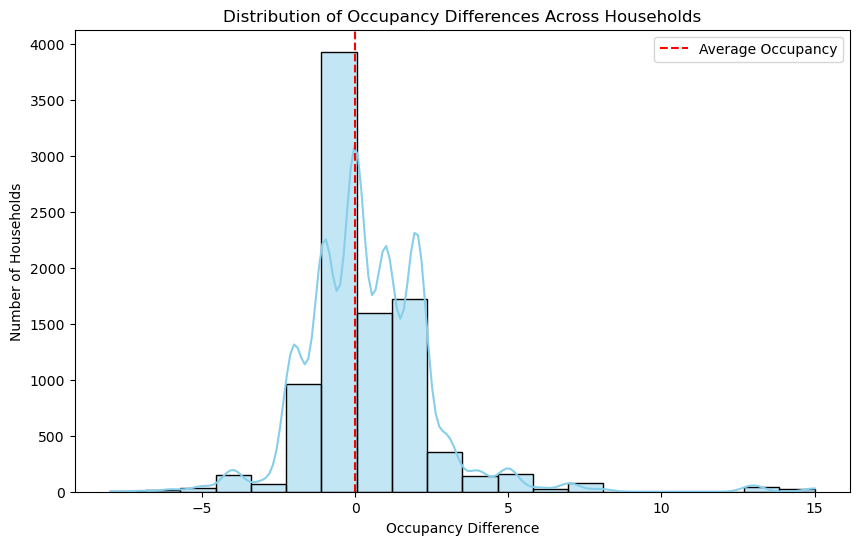

In [61]:
# Plot the distribution of occupancy differences

plt.figure(figsize = (10, 6))
sns.histplot(my_df['Occupancy_Difference'], bins =20, kde =True, color ='Skyblue')

plt.axvline(0, color ='red', linestyle ='--', label ='Average Occupancy')
plt.xlabel('Occupancy Difference')
plt.ylabel('Number of Households')
plt.title('Distribution of Occupancy Differences Across Households')
plt.legend()
plt.show()

The operator plt.axvline is the dash line that separates underutilized (negative) from overcrowded streets

Reference.

Wes Mckinney, Python for Data Analysis, Data Wrangling with Pandas, Numpy and Ipython